## **Localized Sequence Logo Generator**

**What is this tool?**
This online tool, hosted on Google Colab, is designed to generate sequence logos based on the distance from a target residue or ligand in a given dataset of pdbs. The distance is calculated using the alpha carbon positions between protein interfaces or all non-hydrogen atoms in the case of ligands. The tool also includes a 3D visualizer that plots the entire target structure and highlights the residues within the specified distance constraint. There are two options for coloring the interacting residues based on [Amino colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#aminocolours) and [Shapely colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#shapelycolours).

**Required Inputs:**
- PDB Files: Two examples are provided on GitHub, one for protein-protein interactions and one for ligand-protein interactions.
- Target Chain from PDB: The program uses the first file in the directory to upload the target structure.
- Interacting Chain from PDB: This chain identifier must be the same across all PDB files.
- Specify Target Type: Indicate whether the target is a ligand or a protein.
- Target Residue Index (for proteins) or Unique Atom Names (for ligands): Provide the target residue index for proteins or unique atom names for ligands. Alternatively, you can input 'All' to consider all residues/atoms.

**Usage:**
Please execute the cells in numerical order. If you wish to load a different dataset, you can start from the upload step to reload the new data set.


## **1. Run required packages ↓**

##  **2. Upload data, and process**

run next cell to input path to directory containing all PDB files:

Example usages:

Type either **'Protein Example'** or **'Ligand Example'** to run example sets.


In [1]:
!pip install Logomaker
import pandas as pd
import sequence_logo_main
import helper_functions
import os
import glob

C:\Users\camlo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning:

A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1



In [2]:
pdb_files = input("Enter path to files: ")
pdb_files = glob.glob(f"{pdb_files}/*.pdb")
print(pdb_files)

Enter path to files: Ligand Example
['Ligand Example\\5xuk.pdb', 'Ligand Example\\6arb.pdb', 'Ligand Example\\6as5.pdb', 'Ligand Example\\6b3t.pdb', 'Ligand Example\\6be0.pdb', 'Ligand Example\\6ct5.pdb', 'Ligand Example\\6he2.pdb', 'Ligand Example\\6j1e.pdb', 'Ligand Example\\6nds.pdb', 'Ligand Example\\6p7k.pdb', 'Ligand Example\\6qwu.pdb', 'Ligand Example\\6zzk.pdb', 'Ligand Example\\7b4r.pdb', 'Ligand Example\\7bcz.pdb', 'Ligand Example\\7ed0.pdb', 'Ligand Example\\7n8e.pdb', 'Ligand Example\\7s3u.pdb', 'Ligand Example\\7uul.pdb', 'Ligand Example\\7xwv.pdb', 'Ligand Example\\8a9n.pdb']


## 3. Select target and binding chains.
Select target chain, binding chain, select whether the target is a ligand or protein, atom names (if ligand) or residue index (if protein) to visualize, separate by commas.

You can also type 'all' to plot all residues or atoms.

**Example usage:**
- For protein example use B for target chain and A for binding chain.
- For ligand example use Z for target chain and B for binding chain. Use is_ligand function





In [3]:
target_chain = input("Target chain: ")
binding_chain = input("Binding chain: ")
to_plot = input("which residues or atoms to plot (type 'all' to see entire structure): ")
is_ligand = input("Is ligand?: (True or False): ")
distance = int(input("How many Å from target to graph?: " ))
threads = int(input("How many threads to use? Type '1' for default: "))
if is_ligand == "True":
    is_ligand = True
else:
    is_ligand = False

if to_plot == "all":
  plot_list = "all"

else:
    if is_ligand:
      plot_list = [str(x) for x in to_plot.split(",")]
    else:
      plot_list =[int(x) for x in to_plot.split(",")]

Target chain: X
Binding chain: A
which residues or atoms to plot (type 'all' to see entire structure): all
Is ligand?: (True or False): True
How many Å from target to graph?: 8
How many threads to use? Type one for default: 1


In [4]:
from matplotlib.pyplot import plot
df_target,df_binder = sequence_logo_main.plot(pdb_files, target_chain,binding_chain,is_ligand,plot_list, distance, threads)

## **5. Select residues or atoms to generate sequence logos.**
Enter the residue number or carbon names to graph and separated by a commas.
If there are no residues within the given range, next cell will not execute.


In [5]:
sequence_logo_targets = input("Residues to graph: ")

if is_ligand:
  plot_list = [str(x) for x in sequence_logo_targets.split(",")]
else:
  plot_list =[int(x) for x in sequence_logo_targets.split(",")]


Residues to graph: O2B


## **6.  Generate sequence logos**
Select if you'd like to only see the combained logo.

Only combined logo? (True or False): True


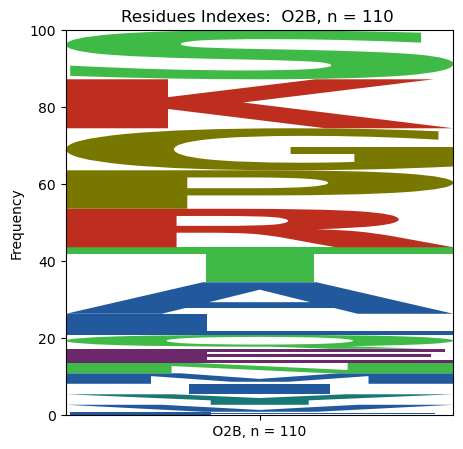

In [8]:

combined = input("Only combined logo? (True or False): ")
if combined == 'True':
    combined = True
else: 
    combined = False
sequence_logo_main.sequence_logos(df_target,df_binder, plot_list, is_ligand,combined, distance)
